In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sne

In [5]:
df_movie=pd.read_csv("movies.csv")

In [6]:
df_rating=pd.read_csv("ratings.csv")

In [7]:
df_tag=pd.read_csv("tags.csv")

In [8]:
df_link=pd.read_csv("links.csv")

In [15]:
df_movie.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
df_rating.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [17]:
df_tag.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [18]:
df_link.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [10]:
df_movie.shape

(9742, 3)

In [11]:
df_rating.shape

(100836, 4)

In [56]:
# Count unique userId values
unique_user_ids = df_rating['userId'].nunique()

print(unique_user_ids)


610


In [57]:
merged_df = pd.merge(df_rating, df_movie, on='movieId')

movie_ratings_count = merged_df.groupby('title').size()

max_ratings_movie_title = movie_ratings_count.idxmax()

print(max_ratings_movie_title)


Forrest Gump (1994)


In [60]:
matrix_movie_id = df_movie[df_movie['title'] == 'Matrix, The (1999)']['movieId'].iloc[0]

matrix_tags = df_tag[df_tag['movieId'] == matrix_movie_id]

unique_matrix_tags = matrix_tags['tag'].unique()

In [61]:
for tag in unique_matrix_tags:
    print(f"- {tag}")

- martial arts
- sci-fi
- alternate universe
- philosophy
- post apocalyptic


In [28]:
average_rating = df_rating[df_rating['movieId'] == df_movie[df_movie['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].iloc[0]]['rating'].mean()

print(average_rating)


3.970982142857143


In [33]:
terminator2_movie_id = df_movie[df_movie['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].iloc[0]


terminator2_ratings = df_rating[df_rating['movieId'] == terminator2_movie_id]

average_rating = terminator2_ratings['rating'].mean()

print(average_rating)


3.970982142857143


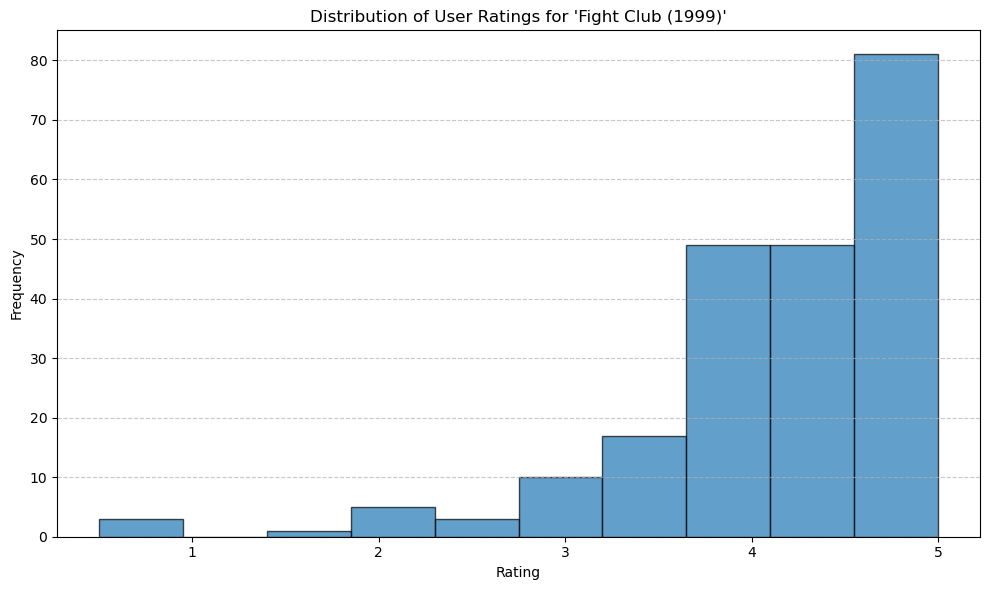

In [41]:
fight_club_movie_id = df_movie[df_movie['title'] == 'Fight Club (1999)']['movieId'].iloc[0]

fight_club_ratings = df_rating[df_rating['movieId'] == fight_club_movie_id]['rating']

plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings, bins=10, edgecolor='k', alpha=0.7)
plt.title("Distribution of User Ratings for 'Fight Club (1999)'")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [45]:
average_ratings = df_rating.groupby('movieId')['rating'].mean().reset_index()

average_ratings = pd.merge(average_ratings, df_movie[['movieId', 'title']], on='movieId')

most_popular_movie = average_ratings.loc[average_ratings['rating'].idxmax()]

print(most_popular_movie['title'])
print(most_popular_movie['rating'])

Lamerica (1994)
5.0


In [62]:
top_5 = df_rating['movieId'].value_counts().head(5)

top_5_movie_titles = df_movie[df_movie['movieId'].isin(top_5.index)]['title']

In [63]:
for title in top_5_movie_titles:
    print("-", title)

- Pulp Fiction (1994)
- Shawshank Redemption, The (1994)
- Forrest Gump (1994)
- Silence of the Lambs, The (1991)
- Matrix, The (1999)


In [64]:
sci_fi_ids = df_movie[df_movie['genres'].str.contains('Sci-Fi')]['movieId']
ratings_count = df_rating[df_rating['movieId'].isin(sci_fi_ids)]['movieId'].value_counts()
third_movie_title = df_movie[df_movie['movieId'] == third_movie_id]['title'].iloc[0]

print(third_movie_title)

Jurassic Park (1993)
